In [1]:
from pathlib import Path

import autochem as ac
import automech
import automol
import more_itertools as mit
import numpy as np
from project_utilities import p_
from protomech import mess

T_range = (300, 1000)
T_test = (500, 600, 700, 800, 900, 1000)
P_test = (0.1, 1, 10, 100)
T_drop = (300,)  # Drop 300 K rates for fit
A_fill = 1e-20
remove_nodes = []

# stoich = "C5H9O"
stoich = "C5H7O2"
# remove_nodes = [
#     1,  # C5H6O(645)z+OH(4)     - QOOH ring-opening product (*)
#     9,  # C5O2sidwaoez          - QOOH ring-opening product
#     20,  # CPND2(626)+OH(4)      - QOOH H-migration product (*)
#     24,  # C5Oqidgnvrs+OH(4)     - 1,3-ring-closing product
#     # * instability
# ]

tag = "Z_mess_v0"
root_path = Path("../..")
stoich_path = Path(stoich)

In [2]:
mech = automech.io.read(p_.stereo_mechanism(tag, "json", p_.data(root_path)))
mech.reactions = automech.reaction.select_pes(mech.reactions, stoich)
mech = automech.without_unused_species(mech)

In [3]:
mess_inp = stoich_path / "mess.inp"
surf = mess.surf.from_mess_input(mess_inp)

In [4]:
mess_out = stoich_path / "rate.out"
surf_out = mess.surf.with_mess_output_rates(surf, mess_out=mess_out)
surf_out = mess.surf.absorb_fake_nodes(surf_out)
surf_out = mess.surf.remove_nodes(surf_out, keys=remove_nodes)
mess.net.display(surf_out, mech=mech, height="1000px")

In [5]:
unfit_skip_rate_keys = mess.surf.unfittable_rate_keys(surf_out, direct=False)
print(f"Dropping unfittable well-skipping rates:\n{unfit_skip_rate_keys}")

surf_out = mess.surf.remove_well_skipping_rates(surf_out, unfit_skip_rate_keys)

Dropping unfittable well-skipping rates:
[(2, 7), (2, 8), (2, 9), (2, 11), (2, 1), (2, 20), (2, 24), (2, 27), (3, 7), (3, 9), (3, 20), (4, 7), (4, 8), (4, 9), (4, 11), (4, 20), (4, 27), (5, 11), (5, 20), (6, 1), (7, 2), (7, 3), (7, 4), (7, 1), (7, 20), (7, 24), (8, 2), (8, 4), (8, 1), (8, 20), (8, 24), (9, 2), (9, 3), (9, 4), (9, 20), (9, 24), (10, 1), (11, 2), (11, 4), (11, 5), (11, 1), (11, 20), (12, 20), (1, 2), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 20), (1, 22), (1, 23), (1, 24), (1, 25), (1, 27), (20, 2), (20, 3), (20, 4), (20, 7), (20, 8), (20, 9), (20, 11), (20, 12), (20, 1), (20, 21), (20, 22), (20, 24), (20, 25), (20, 27), (21, 20), (22, 1), (22, 20), (23, 1), (24, 2), (24, 7), (24, 8), (24, 9), (24, 1), (24, 20), (25, 1), (25, 20), (27, 2), (27, 3), (27, 4), (27, 5), (27, 6), (27, 10), (27, 12), (27, 1), (27, 20), (27, 21), (27, 22), (27, 23), (27, 24), (27, 25), (27, 26)]


In [6]:
surf_out = mess.surf.remove_isolates(surf_out)
irrel_skip_rate_keys = mess.surf.irrelevant_rate_keys(
    surf_out, T=T_test, P=P_test, direct=False, min_branch_frac=0.01
)
print(f"Dropping irrelevant well-skipping rates:\n{irrel_skip_rate_keys}")

surf_out = mess.surf.remove_well_skipping_rates(surf_out, irrel_skip_rate_keys)

Dropping irrelevant well-skipping rates:
[(2, 5), (2, 10), (2, 12), (2, 22), (2, 23), (2, 26), (3, 4), (3, 5), (3, 8), (3, 10), (3, 11), (3, 23), (3, 25), (3, 26), (4, 3), (4, 6), (4, 12), (4, 1), (4, 22), (4, 23), (4, 24), (4, 26), (5, 2), (5, 3), (5, 6), (5, 7), (5, 8), (5, 9), (5, 22), (5, 25), (5, 26), (6, 4), (6, 5), (6, 10), (6, 11), (6, 12), (6, 23), (6, 24), (6, 25), (6, 26), (7, 5), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 23), (7, 25), (7, 26), (8, 3), (8, 7), (8, 9), (8, 11), (8, 12), (8, 26), (9, 5), (9, 7), (9, 8), (9, 11), (9, 12), (9, 25), (9, 26), (10, 2), (10, 3), (10, 6), (10, 7), (10, 12), (10, 22), (10, 24), (10, 25), (10, 26), (11, 6), (11, 7), (11, 8), (11, 9), (11, 12), (11, 24), (11, 25), (11, 26), (12, 2), (12, 4), (12, 6), (12, 7), (12, 8), (12, 9), (12, 10), (12, 11), (12, 24), (12, 25), (20, 26), (21, 7), (21, 8), (21, 9), (21, 11), (21, 1), (21, 24), (21, 26), (22, 2), (22, 4), (22, 5), (22, 7), (22, 8), (22, 9), (22, 10), (22, 11), (22, 12), (22, 23)

In [7]:
branch_frac_dct = mess.surf.branching_fractions(surf_out, T=T_test, P=P_test)

In [8]:
P_vals = (1, 10, 100)

unfit_rate_keys = mess.surf.unfittable_rate_keys(
    surf_out, well_skipping=False, P_vals=P_vals
)

print(f"Rates which cannot be fit for {P_vals}:")
for rate_key in unfit_rate_keys:
    branch_frac = branch_frac_dct[rate_key]
    print(rate_key)
    print(branch_frac)

Rates which cannot be fit for (1, 10, 100):
(3, 1)
[[           nan 4.43072095e-03            nan            nan]
 [           nan 1.61041159e-04            nan            nan]
 [           nan 7.36076697e-08            nan            nan]
 [           nan 2.30195127e-08 7.64197896e-07            nan]
 [           nan 1.92608102e-07 1.49907983e-06 3.56753594e-05]
 [8.36146667e-06 1.52717569e-07 7.23572059e-06 1.91181254e-05]]
(3, 24)
[[           nan            nan 7.86055651e-13            nan]
 [           nan            nan 6.96172269e-12 3.43899274e-12]
 [           nan            nan 1.22564767e-10 2.29547328e-10]
 [           nan            nan 7.46927887e-10 2.09922485e-09]
 [           nan            nan 2.82165035e-09 1.02617967e-08]
 [           nan 2.27175305e-10 7.58213540e-09 6.18953424e-08]]
(5, 1)
[[           nan            nan            nan            nan]
 [           nan            nan            nan            nan]
 [           nan            nan            nan    

In [9]:
min_branch_frac = 1e-6

irrel_rate_keys = mess.surf.irrelevant_rate_keys(
    surf_out, T=T_test, P=P_test, well_skipping=False, min_branch_frac=min_branch_frac
)

print(f"Rates with branching fraction < {min_branch_frac}:")
for rate_key in irrel_rate_keys:
    branch_frac = branch_frac_dct[rate_key]
    print(rate_key)
    print(branch_frac)

Rates with branching fraction < 1e-06:
(2, 3)
[[4.13203891e-08 3.86736040e-08 5.54310229e-08 7.76336991e-08]
 [3.37119437e-08 4.14486430e-08 8.32543488e-08 1.65878272e-07]
 [3.17871710e-08 4.73189321e-08 1.20681291e-07 3.10879545e-07]
 [4.96828847e-08 5.85724918e-08 1.64954263e-07 5.01865445e-07]
 [1.79868172e-07 9.75545536e-08 2.22486565e-07 7.30914073e-07]
 [8.82680462e-07 2.38041217e-07 3.16042877e-07 9.92939111e-07]]
(2, 6)
[[           nan 2.53228664e-10 6.53425303e-10 1.46167478e-09]
 [           nan 3.45962464e-10 1.38757248e-09 5.50414265e-09]
 [           nan 4.64261221e-10 2.39436817e-09 1.45388780e-08]
 [           nan 7.34108564e-10 3.65505593e-09 2.83123474e-08]
 [2.22845523e-09 1.67211312e-09 5.52087554e-09 4.54118211e-08]
 [1.67345117e-08 5.57232849e-09 1.09217538e-08 6.61959407e-08]]
(3, 6)
[[3.10675649e-10 1.89471619e-09 4.58924707e-09 4.97838206e-09]
 [4.52405592e-10 5.15798496e-09 2.43459088e-08 4.12679129e-08]
 [7.16067589e-10 7.55031462e-09 5.74522346e-08 1.7468940

In [10]:
surf_out = mess.surf.match_rate_directions(surf_out, mech)

In [11]:
surf_out = mess.surf.fit_rates(surf_out, T_drop=T_drop, A_fill=A_fill)

/home/avcopan/proj/project-cyclopentane/code/autochem/src/autochem/unit_/_manager.py:61: UserWarning: Currently not fitting high-pressure limit order=1 efficiencies={} A=1.2069316255001423e-18 b=8.738403879519137 E=13901.887312887004 type='arrhenius'
  return func0(self, *args, units=units, **kwargs)
/home/avcopan/proj/project-cyclopentane/code/autochem/src/autochem/unit_/_manager.py:61: UserWarning: Currently not fitting high-pressure limit order=1 efficiencies={} A=3.240545788835501e-09 b=6.475827349099434 E=35920.019025636786 type='arrhenius'
  return func0(self, *args, units=units, **kwargs)
/home/avcopan/proj/project-cyclopentane/code/autochem/src/autochem/unit_/_manager.py:61: UserWarning: Currently not fitting high-pressure limit order=1 efficiencies={} A=2.3870396185874683e-17 b=8.213278442882824 E=5086.954098273543 type='arrhenius'
  return func0(self, *args, units=units, **kwargs)
/home/avcopan/proj/project-cyclopentane/code/autochem/src/autochem/unit_/_manager.py:61: UserWar

Direct rates:
(2, 3) S(1206)r0 = S(1210)r0


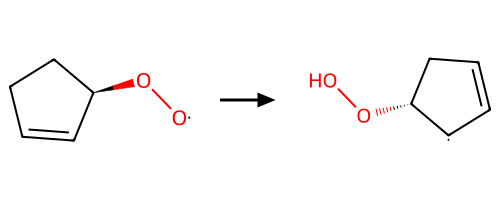

alt.LayerChart(...)

Median branching fraction: 1.0911792233093005e-07
[[4.13203891e-08 3.86736040e-08 5.54310229e-08 7.76336991e-08]
 [3.37119437e-08 4.14486430e-08 8.32543488e-08 1.65878272e-07]
 [3.17871710e-08 4.73189321e-08 1.20681291e-07 3.10879545e-07]
 [4.96828847e-08 5.85724918e-08 1.64954263e-07 5.01865445e-07]
 [1.79868172e-07 9.75545536e-08 2.22486565e-07 7.30914073e-07]
 [8.82680462e-07 2.38041217e-07 3.16042877e-07 9.92939111e-07]]

(2, 21) S(1206)r0 = C5H6(478) + HO2(8)


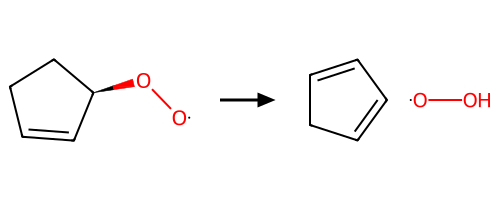

alt.LayerChart(...)

Median branching fraction: 7.374409071361431e-06
[[1.14443550e-07 6.91534178e-07 2.26496299e-06 3.93912821e-06]
 [2.36468670e-07 1.30567404e-06 4.71990188e-06 1.02075456e-05]
 [4.62101211e-07 2.11536459e-06 7.73836683e-06 1.93867289e-05]
 [1.26606229e-06 3.50263501e-06 1.14895889e-05 3.06316328e-05]
 [7.27431458e-06 7.47450357e-06 1.70344963e-05 4.38980937e-05]
 [7.00595102e-05 2.19647123e-05 2.71108890e-05 6.01006709e-05]]

(3, 6) S(1210)r0 = S(1209)r0


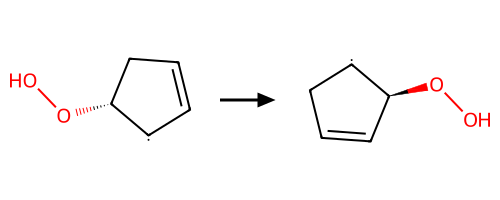

alt.LayerChart(...)

Median branching fraction: 9.89557156146878e-09
[[3.10675649e-10 1.89471619e-09 4.58924707e-09 4.97838206e-09]
 [4.52405592e-10 5.15798496e-09 2.43459088e-08 4.12679129e-08]
 [7.16067589e-10 7.55031462e-09 5.74522346e-08 1.74689407e-07]
 [9.73479206e-10 8.96840216e-09 8.20325425e-08 4.30697182e-07]
 [1.53998908e-09 1.08227410e-08 9.34720362e-08 7.03156159e-07]
 [2.72401611e-09 1.34340766e-08 9.89756599e-08 8.78578226e-07]]

(3, 1) S(1210)r0 = C5H6O(645)z + OH(4)


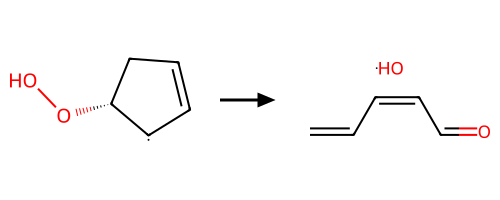

alt.LayerChart(...)

Median branching fraction: 4.367400210390498e-06
[[           nan 4.43072095e-03            nan            nan]
 [           nan 1.61041159e-04            nan            nan]
 [           nan 7.36076697e-08            nan            nan]
 [           nan 2.30195127e-08 7.64197896e-07            nan]
 [           nan 1.92608102e-07 1.49907983e-06 3.56753594e-05]
 [8.36146667e-06 1.52717569e-07 7.23572059e-06 1.91181254e-05]]

(3, 22) S(1210)r0 = OH(4) + S(1288)rs0


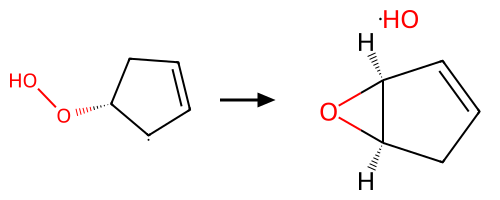

alt.LayerChart(...)

Median branching fraction: 0.7822220442183778
[[0.91857019 0.89877563 0.89902173 0.89845706]
 [0.87797356 0.84021474 0.82466233 0.82142798]
 [0.84438865 0.78678259 0.75156034 0.74174912]
 [0.81824172 0.74421256 0.69067515 0.66808933]
 [0.79608845 0.71151267 0.64266434 0.60767683]
 [0.7776615  0.68589833 0.60720068 0.55906532]]

(3, 24) S(1210)r0 = C5Oqidgnvrs + OH(4)


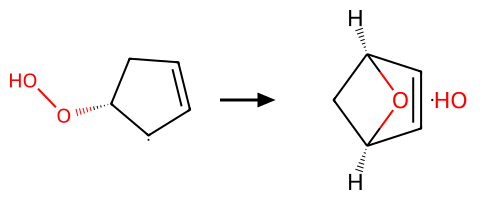

alt.LayerChart(...)

Median branching fraction: 4.882376077148485e-10
[[           nan            nan 7.86055651e-13            nan]
 [           nan            nan 6.96172269e-12 3.43899274e-12]
 [           nan            nan 1.22564767e-10 2.29547328e-10]
 [           nan            nan 7.46927887e-10 2.09922485e-09]
 [           nan            nan 2.82165035e-09 1.02617967e-08]
 [           nan 2.27175305e-10 7.58213540e-09 6.18953424e-08]]

(4, 5) S(1206)r1 = S(1210)r1


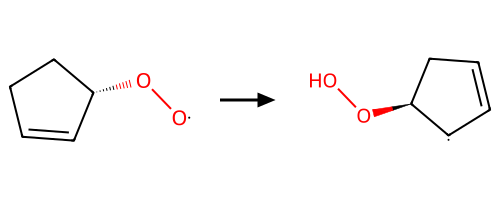

alt.LayerChart(...)

Median branching fraction: 1.0911792233093005e-07
[[4.13203891e-08 3.86736040e-08 5.54310229e-08 7.76336991e-08]
 [3.36715217e-08 4.14486430e-08 8.32543488e-08 1.65878272e-07]
 [3.17871710e-08 4.73189321e-08 1.20681291e-07 3.10879545e-07]
 [4.98376600e-08 5.85724918e-08 1.64954263e-07 5.01865445e-07]
 [1.78276419e-07 9.75545536e-08 2.22486565e-07 7.30914073e-07]
 [8.82680462e-07 2.38041217e-07 3.16042877e-07 9.92939111e-07]]

(4, 21) S(1206)r1 = C5H6(478) + HO2(8)


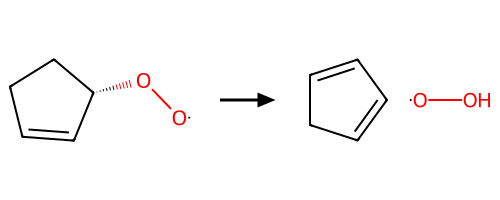

alt.LayerChart(...)

Median branching fraction: 7.374409077208784e-06
[[1.14443550e-07 6.91534033e-07 2.26496299e-06 3.93912821e-06]
 [2.36468670e-07 1.30567404e-06 4.71990188e-06 1.02075456e-05]
 [4.62101211e-07 2.11536459e-06 7.73836683e-06 1.93867289e-05]
 [1.26606229e-06 3.50263501e-06 1.14895889e-05 3.06316328e-05]
 [7.27431459e-06 7.47450357e-06 1.70344963e-05 4.38980937e-05]
 [7.00595102e-05 2.19647123e-05 2.71108890e-05 6.01006709e-05]]

(5, 10) S(1210)r1 = S(1209)r1


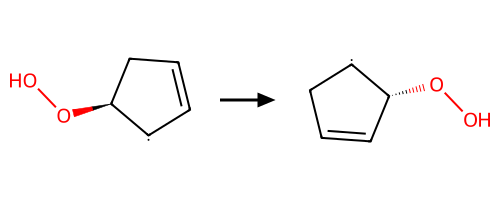

alt.LayerChart(...)

Median branching fraction: 9.895572706966903e-09
[[3.08335343e-10 1.84459010e-09 4.56830996e-09 4.97838206e-09]
 [6.28719366e-10 5.13475951e-09 2.43459088e-08 4.12679129e-08]
 [7.15264236e-10 7.55031518e-09 5.74522345e-08 1.74689407e-07]
 [9.66600458e-10 8.96840237e-09 8.20326052e-08 4.30697180e-07]
 [1.53999047e-09 1.08227430e-08 9.34721763e-08 7.03181239e-07]
 [2.65187892e-09 1.34340786e-08 9.89761349e-08 8.78584181e-07]]

(5, 1) S(1210)r1 = C5H6O(645)z + OH(4)


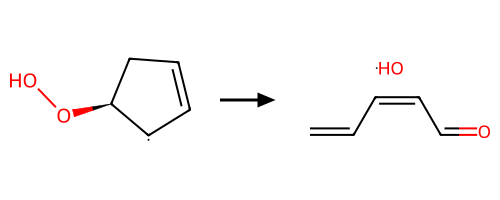

alt.LayerChart(...)

Median branching fraction: 7.388288940863973e-06
[[           nan            nan            nan            nan]
 [           nan            nan            nan            nan]
 [           nan            nan            nan            nan]
 [           nan            nan            nan            nan]
 [           nan            nan            nan            nan]
 [           nan            nan 2.43691241e-06 1.23396655e-05]]

(5, 23) S(1210)r1 = OH(4) + S(1288)rs1


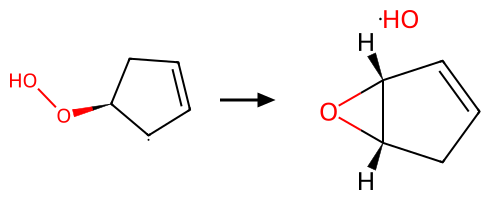

alt.LayerChart(...)

Median branching fraction: 0.7822253243975721
[[0.91857019 0.90277558 0.89917218 0.89845706]
 [0.87798283 0.84037225 0.82466233 0.82142798]
 [0.84439014 0.78678265 0.75156034 0.74174912]
 [0.81823695 0.74421258 0.69067568 0.66808933]
 [0.79608826 0.71151281 0.6426653  0.60769851]
 [0.777668   0.68589843 0.60720359 0.55906911]]

(5, 24) S(1210)r1 = C5Oqidgnvrs + OH(4)


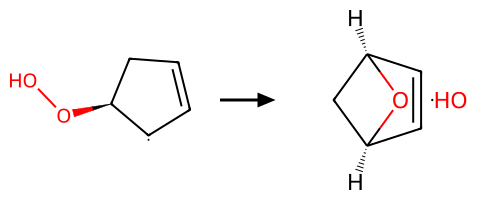

alt.LayerChart(...)

Median branching fraction: 5.763233315582934e-10
[[           nan            nan            nan            nan]
 [           nan            nan 3.34001724e-12            nan]
 [           nan            nan 4.07272507e-10 3.57160080e-10]
 [           nan            nan 7.45374156e-10 6.40958795e-09]
 [2.26759651e-10            nan 2.85207713e-09 1.86057473e-08]
 [7.20697706e-11 2.26858498e-10 7.58442125e-09 6.19286678e-08]]

(6, 2) S(1209)r0 = S(1206)r0


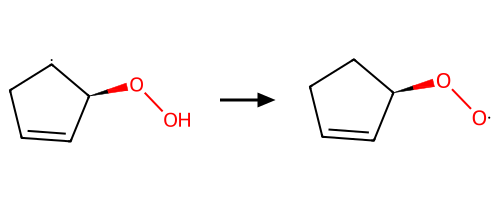

alt.LayerChart(...)

Median branching fraction: 3.024712050715713e-09 (reverse direction)
[[           nan 2.53228664e-10 6.53425303e-10 1.46167478e-09]
 [           nan 3.45962464e-10 1.38757248e-09 5.50414265e-09]
 [           nan 4.64261221e-10 2.39436817e-09 1.45388780e-08]
 [           nan 7.34108564e-10 3.65505593e-09 2.83123474e-08]
 [2.22845523e-09 1.67211312e-09 5.52087554e-09 4.54118211e-08]
 [1.67345117e-08 5.57232849e-09 1.09217538e-08 6.61959407e-08]]

(6, 7) S(1209)r0 = C5O2pkpfsder0


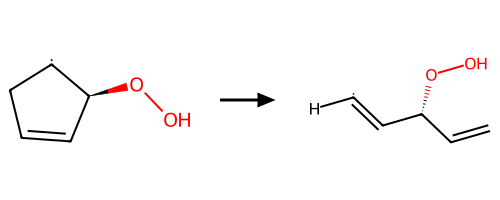

alt.LayerChart(...)

Median branching fraction: 4.804546010388076e-12
[[           nan            nan            nan 4.05636564e-14]
 [           nan            nan 4.43678410e-14 3.54899052e-12]
 [           nan            nan 7.60639117e-13 8.13008266e-11]
 [           nan 1.45028562e-14 6.06010150e-12 7.23476187e-10]
 [           nan 1.33869103e-13 3.02949143e-11 3.53802862e-09]
 [           nan 8.65555795e-13 1.13496241e-10 1.17861776e-08]]

(6, 8) S(1209)r0 = C5O2sidwaoee


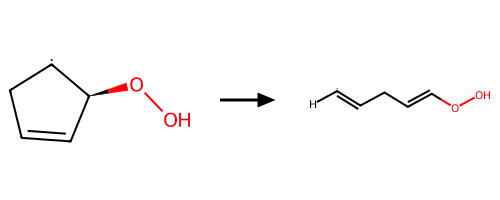

alt.LayerChart(...)

Median branching fraction: 2.797680495341176e-11
[[           nan            nan            nan 2.35304327e-13]
 [           nan            nan 3.68977453e-13 2.05202295e-11]
 [           nan            nan 5.20844413e-12 3.98139850e-10]
 [           nan 1.05359918e-13 3.54333804e-11 3.13198158e-09]
 [           nan 8.28151018e-13 1.56722509e-10 1.39230769e-08]
 [           nan 4.90175497e-12 5.33980524e-10 4.29353611e-08]]

(6, 9) S(1209)r0 = C5O2sidwaoez


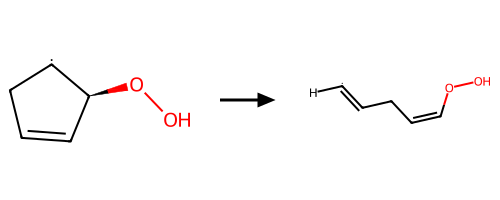

alt.LayerChart(...)

Median branching fraction: 2.650938031784685e-12
[[           nan            nan            nan 9.97409387e-15]
 [           nan            nan 1.40347252e-14 5.01231836e-13]
 [           nan            nan 1.01203679e-13 1.18772812e-11]
 [           nan            nan 8.41128843e-13 1.10139426e-10]
 [           nan            nan 4.46074722e-12 5.63553111e-10]
 [           nan 1.21682910e-13 1.74406567e-11 1.97418474e-09]]

(6, 20) S(1209)r0 = CPND2(626) + OH(4)


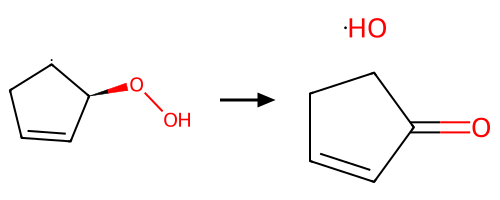

alt.LayerChart(...)

Median branching fraction: 5.724714810451004e-07
[[           nan            nan            nan            nan]
 [           nan            nan            nan            nan]
 [           nan            nan            nan            nan]
 [           nan            nan            nan            nan]
 [           nan            nan            nan            nan]
 [           nan            nan            nan 5.72471481e-07]]

(6, 22) S(1209)r0 = OH(4) + S(1288)rs0


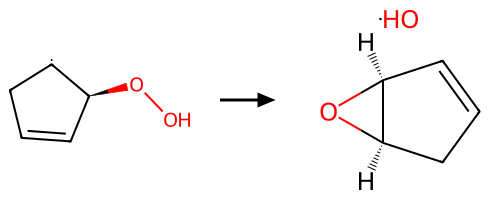

alt.LayerChart(...)

Median branching fraction: 0.0003315946350215847 (reverse direction)
[[4.58379171e-05 1.02879170e-04 1.50921356e-04 1.82568186e-04]
 [8.18114882e-05 2.43555109e-04 5.23502898e-04 7.63465251e-04]
 [9.69293793e-05 3.33401159e-04 9.79304607e-04 1.94369721e-03]
 [8.70636594e-05 3.55370121e-04 1.22867240e-03 3.37452856e-03]
 [7.00471764e-05 3.29788111e-04 1.28115537e-03 4.34104216e-03]
 [5.97597039e-05 2.82211392e-04 1.22474251e-03 4.64650146e-03]]

(7, 27) C5O2pkpfsder0 = C2H2(40) + C3H4O(165) + OH(4)


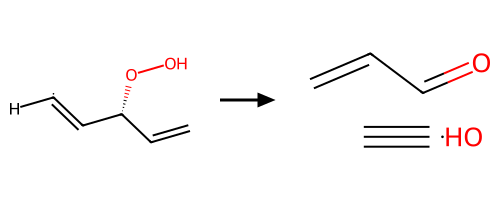

alt.LayerChart(...)

/tmp/ipykernel_80416/1010564925.py:32: RuntimeWarning: All-NaN slice encountered
  rate_key, rev_rate_key, key=lambda k: np.nanmedian(branch_frac_dct[k])


Median branching fraction: 0.9999933554948366
[[1.         1.         1.         0.00206868]
 [1.         1.         0.79708384 0.03933394]
 [1.         1.         0.98454177 0.28719008]
 [1.         0.99999097 0.99837193 0.75301205]
 [1.         0.99999574 0.99971295 0.94825051]
 [1.         0.99999714 0.99991632 0.9885512 ]]

(8, 27) C5O2sidwaoee = C2H2(40) + C3H4O(165) + OH(4)


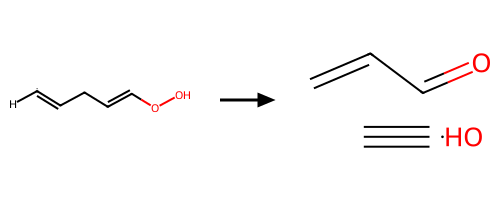

alt.LayerChart(...)

/tmp/ipykernel_80416/1010564925.py:32: RuntimeWarning: All-NaN slice encountered
  rate_key, rev_rate_key, key=lambda k: np.nanmedian(branch_frac_dct[k])


Median branching fraction: 0.998095702236858
[[1.00000000e+00 1.00000000e+00 3.87572491e-03 5.82922278e-05]
 [1.00000000e+00 1.00000000e+00 6.85006128e-02 1.29734384e-03]
 [1.00000000e+00 1.00000000e+00 5.77549789e-01 1.56085416e-02]
 [1.00000000e+00 9.99346884e-01 9.33680104e-01 1.19945168e-01]
 [1.00000000e+00 9.99748155e-01 9.88310308e-01 4.74885845e-01]
 [1.00000000e+00 9.99849448e-01 9.96844521e-01 8.23946600e-01]]

(9, 27) C5O2sidwaoez = C2H2(40) + C3H4O(165) + OH(4)


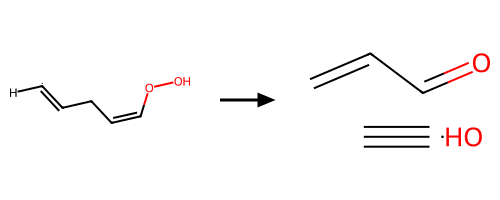

alt.LayerChart(...)

/tmp/ipykernel_80416/1010564925.py:32: RuntimeWarning: All-NaN slice encountered
  rate_key, rev_rate_key, key=lambda k: np.nanmedian(branch_frac_dct[k])


Median branching fraction: 0.9999441160678726
[[1.         0.07878283 1.         0.00506026]
 [1.         0.78688525 0.89049338 0.14800389]
 [1.         0.99999137 0.99706314 0.44946809]
 [1.         0.99999791 0.99944073 0.85497305]
 [1.         0.99999848 0.99991156 0.97243986]
 [1.         0.99999901 0.99997668 0.99422102]]

(10, 4) S(1209)r1 = S(1206)r1


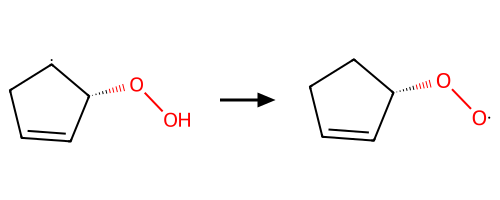

alt.LayerChart(...)

Median branching fraction: 1.942325409621447e-09 (reverse direction)
[[1.42067855e-10 2.53228664e-10 6.53425303e-10 1.46167478e-09]
 [1.54412020e-10 3.45962464e-10 1.38757248e-09 5.50414265e-09]
 [4.72977785e-10 4.64261221e-10 2.39436817e-09 1.45388780e-08]
 [4.28727696e-10 7.34108564e-10 3.65505593e-09 2.83123474e-08]
 [2.21253770e-09 1.67211312e-09 6.22868009e-09 4.54118211e-08]
 [1.67345117e-08 5.57232849e-09 1.09217538e-08 6.61959407e-08]]

(10, 8) S(1209)r1 = C5O2sidwaoee


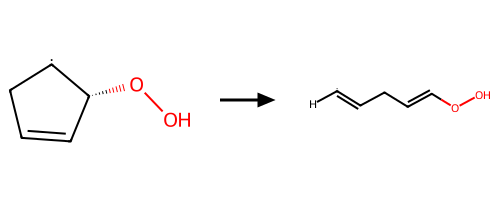

alt.LayerChart(...)

Median branching fraction: 2.0520229876537882e-11
[[           nan            nan 6.81349596e-15 2.37136542e-13]
 [           nan            nan 3.62191122e-13 2.05202299e-11]
 [           nan            nan 5.20471671e-12 3.98139850e-10]
 [           nan 1.06470666e-13 3.54333150e-11 3.13198158e-09]
 [           nan 8.40909029e-13 1.56721477e-10 1.39230769e-08]
 [           nan 4.93621115e-12 5.33980340e-10 4.29353857e-08]]

(10, 9) S(1209)r1 = C5O2sidwaoez


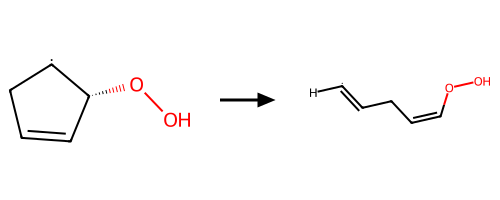

alt.LayerChart(...)

Median branching fraction: 8.477503406148629e-13
[[           nan 8.83523875e-16            nan            nan]
 [           nan 5.82860474e-14            nan            nan]
 [           nan 4.84975070e-16            nan 1.18438241e-11]
 [           nan 5.95029801e-15 8.47750341e-13 1.10139426e-10]
 [           nan 2.24329866e-14 4.46071783e-12 5.63553111e-10]
 [           nan 1.32014949e-13 1.74406507e-11 1.97418587e-09]]

(10, 11) S(1209)r1 = C5O2pkpfsder1


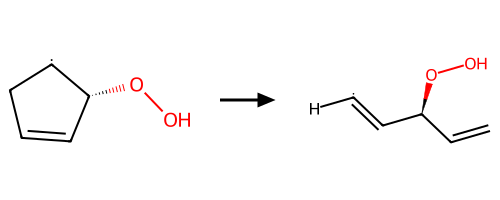

alt.LayerChart(...)

Median branching fraction: 3.666729600889556e-12
[[           nan            nan 4.52942629e-16 3.09693245e-14]
 [           nan            nan 4.32365652e-14 3.66672960e-12]
 [           nan            nan 7.60094767e-13 8.13008266e-11]
 [           nan 1.45663295e-14 6.06009033e-12 7.23476187e-10]
 [           nan 1.32498927e-13 3.02947147e-11 3.53802862e-09]
 [           nan 8.81630271e-13 1.13496202e-10 1.17861843e-08]]

(10, 20) S(1209)r1 = CPND2(626) + OH(4)


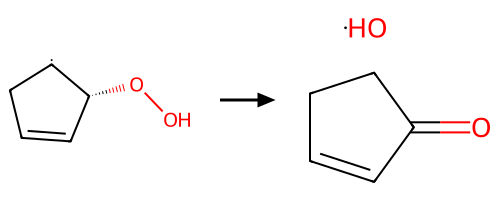

/home/avcopan/proj/project-cyclopentane/code/autochem/src/autochem/rate/data.py:398: RuntimeWarning: invalid value encountered in multiply
  kTP = self.A * (T_**self.b) * np.exp(-self.E / (R * T_))  # noqa: N806


alt.LayerChart(...)

Median branching fraction: 0.00010946738018617903
[[           nan            nan            nan            nan]
 [           nan            nan            nan            nan]
 [           nan            nan 7.15004400e-04            nan]
 [8.63659919e-04 3.96686534e-07 2.17567177e-06            nan]
 [1.56038409e-03 4.35541026e-04 6.34519221e-06            nan]
 [2.12589568e-04 2.16963699e-06 3.45158395e-07            nan]]

(10, 23) S(1209)r1 = OH(4) + S(1288)rs1


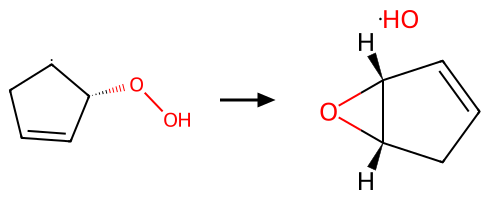

alt.LayerChart(...)

Median branching fraction: 0.00030599975162353744 (reverse direction)
[[2.18330212e-09 1.03080085e-04 1.50921356e-04 1.82568186e-04]
 [4.08283876e-06 2.43555109e-04 5.23502898e-04 2.75700451e-04]
 [4.51286046e-05 3.33401159e-04 9.79304607e-04 1.88646798e-03]
 [8.69559489e-05 3.55370121e-04 1.22867240e-03 3.37322410e-03]
 [7.00139950e-05 3.29788111e-04 1.28115537e-03 4.34035823e-03]
 [5.97450979e-05 2.82211392e-04 1.22474251e-03 4.64637742e-03]]

(11, 27) C5O2pkpfsder1 = C2H2(40) + C3H4O(165) + OH(4)


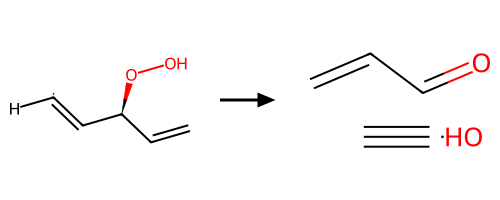

alt.LayerChart(...)

/tmp/ipykernel_80416/1010564925.py:32: RuntimeWarning: All-NaN slice encountered
  rate_key, rev_rate_key, key=lambda k: np.nanmedian(branch_frac_dct[k])


Median branching fraction: 0.9999536469364256
[[1.         1.         0.16346154 0.00273373]
 [1.         1.         0.8009768  0.03811346]
 [1.         1.         0.98454177 0.28719008]
 [1.         0.99999097 0.99837193 0.75301205]
 [1.         0.99999577 0.99971295 0.94825051]
 [1.         0.99999712 0.99991632 0.9885512 ]]

(12, 3) S(602) = S(1210)r0


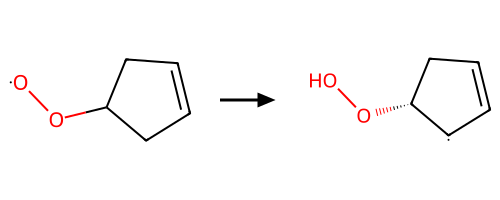

alt.LayerChart(...)

Median branching fraction: 0.00012335852904736498 (reverse direction)
[[1.01803320e-04 1.03480654e-04 1.05435010e-04 1.05673204e-04]
 [9.46984586e-05 1.11095061e-04 1.21930750e-04 1.24786308e-04]
 [9.63783962e-05 1.27628749e-04 1.58951182e-04 1.72938623e-04]
 [9.04438128e-05 1.32592393e-04 1.89970098e-04 2.30948646e-04]
 [8.27490472e-05 1.25195266e-04 1.99877310e-04 2.81083997e-04]
 [7.90145070e-05 1.11528183e-04 1.88203717e-04 3.06350685e-04]]

(12, 5) S(602) = S(1210)r1


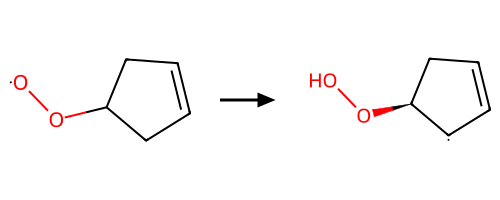

alt.LayerChart(...)

Median branching fraction: 0.00012335852904780034 (reverse direction)
[[1.01803320e-04 1.03941188e-04 1.05277925e-04 1.05673204e-04]
 [9.46912704e-05 1.11097524e-04 1.21930750e-04 1.24786308e-04]
 [9.63774750e-05 1.27628759e-04 1.58951182e-04 1.72938623e-04]
 [9.04461857e-05 1.32592396e-04 1.89970244e-04 2.30948645e-04]
 [8.27491218e-05 1.25195290e-04 1.99877610e-04 2.81094023e-04]
 [7.90151677e-05 1.11528200e-04 1.88204620e-04 3.06352761e-04]]

(12, 21) S(602) = C5H6(478) + HO2(8)


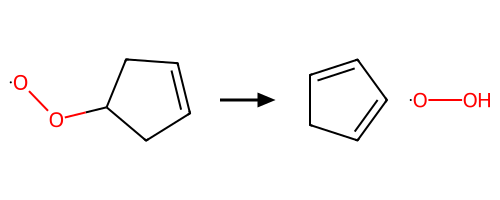

alt.LayerChart(...)

Median branching fraction: 0.0005985638654832413 (reverse direction)
[[0.00035847 0.00033691 0.0003265  0.00033305]
 [0.00054982 0.00060075 0.00058536 0.00059637]
 [0.00055292 0.00082238 0.0008744  0.00089466]
 [0.00038459 0.00084993 0.00113421 0.00120238]
 [0.00021628 0.00066754 0.00125442 0.00151065]
 [0.0001176  0.00042041 0.00114955 0.00175409]]

(21, 3) C5H6(478) + HO2(8) = S(1210)r0


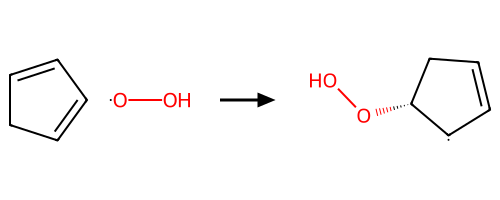

alt.LayerChart(...)

Median branching fraction: 0.21767015802896184 (reverse direction)
[[0.08132722 0.09668819 0.10086741 0.10142749]
 [0.12193155 0.15951244 0.17521207 0.17843459]
 [0.15551491 0.21308947 0.24827877 0.25806567]
 [0.18166779 0.25565471 0.30913316 0.33167074]
 [0.20382872 0.28836184 0.35713372 0.39200064]
 [0.22225085 0.31398986 0.39260345 0.44060534]]

(21, 5) C5H6(478) + HO2(8) = S(1210)r1


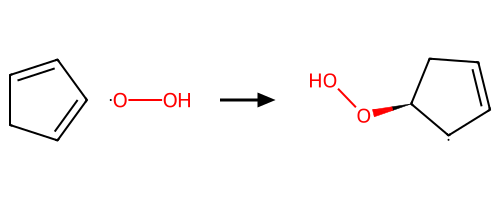

alt.LayerChart(...)

Median branching fraction: 0.21767109505079202 (reverse direction)
[[0.08132722 0.0971185  0.10071713 0.10142749]
 [0.12192229 0.15951597 0.17521207 0.17843459]
 [0.15551342 0.21308948 0.24827877 0.25806567]
 [0.18167256 0.25565471 0.3091334  0.33167074]
 [0.2038289  0.2883619  0.35713426 0.39201462]
 [0.22225271 0.3139899  0.39260534 0.44060832]]

(21, 6) C5H6(478) + HO2(8) = S(1209)r0


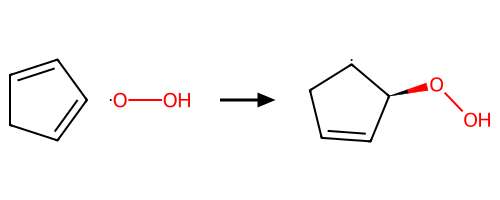

alt.LayerChart(...)

Median branching fraction: 0.0028039460594111217
[[0.00093939 0.00217358 0.00314765 0.00352901]
 [0.00071818 0.00251096 0.00547813 0.00748881]
 [0.00043432 0.0019983  0.00626204 0.01186103]
 [0.00026079 0.00138445 0.00550508 0.01449691]
 [0.00017267 0.00093251 0.0042525  0.01447178]
 [0.00012348 0.00060887 0.00309693 0.0124979 ]]

(21, 10) C5H6(478) + HO2(8) = S(1209)r1


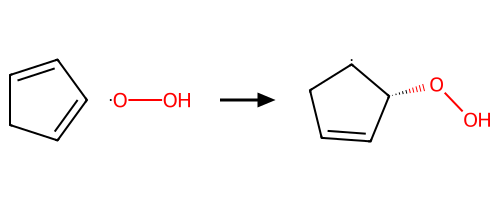

alt.LayerChart(...)

Median branching fraction: 0.0028039460594111217
[[0.00093939 0.00217358 0.00314765 0.00352901]
 [0.00071818 0.00251096 0.00547813 0.00748881]
 [0.00043432 0.0019983  0.00626204 0.01186103]
 [0.00026079 0.00138445 0.00550508 0.01449691]
 [0.00017267 0.00093251 0.0042525  0.01447178]
 [0.00012348 0.00060887 0.00309693 0.0124979 ]]

(25, 2) C5H7(500) + O2(6) = S(1206)r0


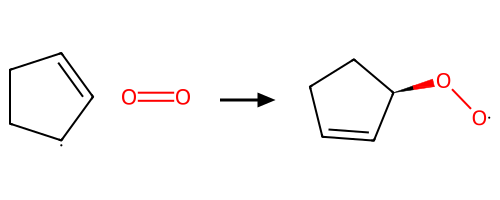

alt.LayerChart(...)

Median branching fraction: 0.49874211198665636
[[0.49997481 0.49999217 0.49999703 0.4999991 ]
 [0.49956355 0.49991083 0.49997568 0.49999276]
 [0.49411851 0.49884342 0.49980036 0.49995644]
 [0.45786841 0.48796841 0.49825899 0.49976469]
 [0.33783784 0.4276885  0.48546279 0.4986408 ]
 [0.16633466 0.28187919 0.41984057 0.49244015]]

(25, 4) C5H7(500) + O2(6) = S(1206)r1


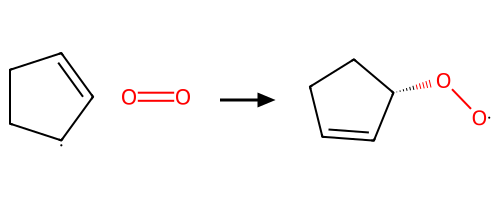

alt.LayerChart(...)

Median branching fraction: 0.49874211198665636
[[0.49997481 0.49999217 0.49999703 0.4999991 ]
 [0.49956355 0.49991083 0.49997568 0.49999276]
 [0.49411851 0.49884342 0.49980036 0.49995644]
 [0.45786841 0.48796841 0.49825899 0.49976469]
 [0.33783784 0.4276885  0.48546279 0.4986408 ]
 [0.16633466 0.28187919 0.41984057 0.49244015]]

(26, 12) C5H7(504) + O2(6) = S(602)


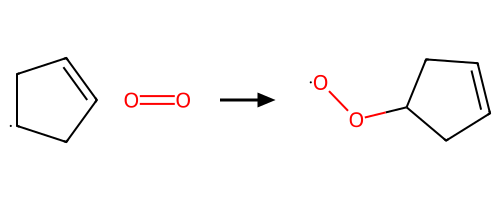

alt.LayerChart(...)

Median branching fraction: 0.8828701784281201 (reverse direction)
[[0.57616666 0.10994797 0.59171515 0.59341421]
 [0.80744386 0.8139647  0.8199501  0.82135662]
 [0.8684725  0.88073632 0.88242167 0.88331869]
 [0.88870798 0.90407221 0.90744619 0.90745266]
 [0.8892615  0.91332628 0.91860481 0.91808975]
 [0.86655199 0.91396414 0.92402446 0.92367591]]



In [12]:
label_dct = mess.surf.node_label_dict(surf_out)
obj_col = automech.util.df_.c_.temp()

print("Direct rates:")
for rate_key in mess.surf.direct_rate_keys(surf_out):
    eq = mess.surf.edge_chemkin_equation(surf_out, rate_key)
    print(rate_key, eq)

    rate = surf_out.rates[rate_key]
    rate_fit = surf_out.rate_fits[rate_key]

    amchis = list(mit.unique_everseen(automech.reaction_amchis(mech, eq=eq)))
    for amchi in amchis:
        automol.amchi.display_reaction(*amchi)

    ref_rates = ref_labels = []
    if amchis:
        ref_rates = [r.rate for r in automech.reaction_rate_objects(mech, eq)]
        ref_labels = [f"Ref {i}" for i, _ in enumerate(ref_rates)]

    display(
        ac.rate.data.display(
            [rate, rate_fit, *ref_rates],
            T_range=T_range,
            label=["Data", "Fit", *ref_labels],
        )
    )

    key1, key2 = rate_key
    rev_rate_key = (key2, key1)
    min_rate_key = min(
        rate_key, rev_rate_key, key=lambda k: np.nanmedian(branch_frac_dct[k])
    )
    branch_frac_arr = branch_frac_dct[min_rate_key]
    branch_frac = np.nanmedian(branch_frac_arr)
    if rate_key == min_rate_key:
        print(f"Median branching fraction: {branch_frac}")
    else:
        print(f"Median branching fraction: {branch_frac} (reverse direction)")

    print(branch_frac_arr)
    print()

In [13]:
print("Well-skipping rates:")
for rate_key in mess.surf.well_skipping_rate_keys(surf_out):
    print(rate_key)
    rate = surf_out.rates[rate_key]
    rate_fit = surf_out.rate_fits[rate_key]
    display(
        ac.rate.data.display([rate, rate_fit], T_range=T_range, label=["Data", "Fit"])
    )

Well-skipping rates:
(2, 4)


alt.LayerChart(...)

(12, 1)


/home/avcopan/proj/project-cyclopentane/code/autochem/src/autochem/rate/data.py:398: RuntimeWarning: overflow encountered in power
  kTP = self.A * (T_**self.b) * np.exp(-self.E / (R * T_))  # noqa: N806
/home/avcopan/proj/project-cyclopentane/code/autochem/src/autochem/rate/data.py:398: RuntimeWarning: invalid value encountered in multiply
  kTP = self.A * (T_**self.b) * np.exp(-self.E / (R * T_))  # noqa: N806


alt.LayerChart(...)

(20, 23)


alt.LayerChart(...)

(21, 22)


alt.LayerChart(...)

(21, 23)


alt.LayerChart(...)

(25, 21)


alt.LayerChart(...)